### Google Drive 마운트
데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. 이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다. 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 /contents/drive/MyDrive에서 자신의 Drive 최상단 폴더가 보입니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 실습용 Bioconda 환경 설치하기
실습용 프로그램들을 쉽게 설치할 수 있도록 Bioconda 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 pip 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 GitHub 프로젝트에 있습니다.

In [3]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.profile
./root/.vimrc
./root/.bashrc.biolab
./root/.condarc
./root/.tmux.conf
--2021-06-04 07:18:13--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  89.87M   153MB/s    in 0.6s    

2021-06-04 07:18:13 (153 MB/s) - ‘miniconda3.sh’ save

In [4]:
%cd /content/drive/MyDrive/BioLab/binfo1-datapack1/

/content/drive/MyDrive/BioLab/binfo1-datapack1


In [5]:
!conda install -y bedtools bioawk

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h5bf99c6_6         188 KB  bioconda
    ------------------------------------------------------------
                                           Total:         188 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h5bf99c6_6



bioawk-1.0           | 188 KB    | : 100% 1.0/1 [00:00<00:00,  6.31it/s]                
Preparing transaction: | done

In [6]:
!conda install -y subread
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 

Solving environment: | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - subread


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    subread-2.0.1              |       h5bf99c6_1        22.8 MB  bioconda
    ------------------------------------------------------------
                                           Total:        22.8 MB

The following NEW packages will be INSTALLED:

  subread            bioconda/linux-64::subread-2.0.1-h5bf99c6_1



subread-2.0.1        | 22.8 MB   | : 100% 1.0/1 [00:03<00:00,  3.96s/it]
Preparing transaction: \ done
Verifying transaction: / - done
Execut

### Ribosome Density 와  CLIP Enrichment로 보는 siLin28a과 siLuc의 비교

In [15]:
import numpy as np
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [16]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [17]:
# 35L33G.bam	RNA-control.bam	RNA-siLin28a.bam	RNA-siLuc.bam	RPF-siLin28a.bam	RPF-siLuc.bam
def findOrigin(x):
  CLIP_35L33G = x[5]
  RNA_control = x[6]
  RNA_siLin28 = x[7]
  RNA_siLuc = x[8]
  RPF_siLin28a = x[9]
  RPF_siLuc = x[10]
  max_val = max(CLIP_35L33G, RNA_control, RNA_siLin28, RNA_siLuc, RPF_siLin28a, RPF_siLuc)
  if max_val == CLIP_35L33G:
    return "CLIP_35L33G"
  elif max_val == RNA_control:
    return "RNA_control"
  elif max_val == RNA_siLin28:
    return "RNA_siLin28a"
  elif max_val == RNA_siLuc:
    return "RNA_siLuc"
  elif max_val == RPF_siLin28a:
    return "RPF_siLin28a"
  elif max_val == RPF_siLuc:
    return "RPF_siLuc"

In [18]:
cnts['data'] = cnts.apply(lambda x: findOrigin(x) , axis=1)
cnts

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,data
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,CLIP_35L33G
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,CLIP_35L33G
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN,CLIP_35L33G
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN,CLIP_35L33G
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,CLIP_35L33G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,RPF_siLin28a
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474,CLIP_35L33G
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,RPF_siLin28a


In [19]:
cnts2 = cnts[cnts.data.apply(lambda x: x in ('RPF_siLin28a', 'RPF_siLuc'))]
cnts2['clip_enrichment'] = np.log2(cnts2['clip_enrichment'])
cnts2['rden_change'] = np.log2(cnts2['rden_change'])
cnts2

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,data
Geneid,,,,,,,,,,,,,,
ENSMUSG00000091305.2,chr1,4997251,4997522,-,272,0,0,0,0,5,0,NaN,NaN,RPF_siLin28a
ENSMUSG00000103936.2,chr1,5688060,5688453,-,394,0,0,0,0,0,1,NaN,NaN,RPF_siLuc
ENSMUSG00000102534.2,chr1,7068441,7068765,+,325,0,0,0,0,0,1,NaN,NaN,RPF_siLuc
ENSMUSG00000102213.2,chr1,7083986,7084144,+,159,0,0,0,0,0,1,NaN,NaN,RPF_siLuc
ENSMUSG00000103498.2,chr1;chr1,7480903;7481367,7481175;7482217,+;+,1124,0,0,0,0,1,0,NaN,NaN,RPF_siLin28a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064365.1,chrM,11613,11671,+,59,482,1,56,51,1424,1341,8.912889,-0.048290,RPF_siLin28a
ENSMUSG00000064366.1,chrM,11671,11741,+,71,97,19,43,44,2508,2021,2.351985,0.344635,RPF_siLin28a
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,-0.246195,0.337745,RPF_siLin28a


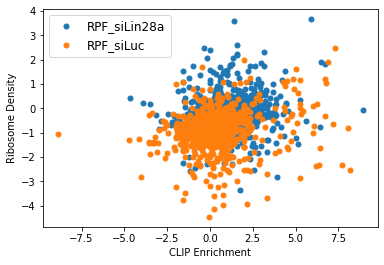

In [26]:
# Scatter plot with a different color by groups
# CLIP: CLIP (Cross-linking immunoprecipitation)는 RNA와의 단백질 상호 작용을 분석하거나 
# RNA 변형 (예 : m6A)을 정확하게 찾기 위해 UV 가교와 면역 침강을 결합하는 분자 생물학에서 사용되는 방법입니다. 
# CLIP 기반 기술을 사용하여 RNA 결합 단백질 결합 부위 또는 RNA 변형 부위를 게놈 전체 규모로 매핑하여 
# 전사 후 조절 네트워크에 대한 이해를 높일 수 있습니다.
import matplotlib.pyplot as plt
groups = cnts2.groupby('data')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(
        group.clip_enrichment, 
        group.rden_change, 
        marker='o', 
        linestyle='',
        markersize=5,
        label=name
    )
ax.set_xlabel('CLIP Enrichment')
ax.set_ylabel('Ribosome Density')
ax.legend(fontsize=12, loc='upper left') # legend position
plt.show()

In [22]:
cnts3 = cnts[cnts.data.apply(lambda x: x in ('RNA_siLin28a', 'RNA_siLuc'))]
cnts3['clip_enrichment'] = np.log2(cnts3['clip_enrichment'])
cnts3['rden_change'] = np.log2(cnts3['rden_change'])
cnts3

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,data
Geneid,,,,,,,,,,,,,,
ENSMUSG00000103147.2,chr1,3602018,3602943,+,926,0,0,1,0,0,0,NaN,NaN,RNA_siLin28a
ENSMUSG00000102348.2,chr1,3750378,3752011,+,1634,0,0,1,0,0,1,NaN,-inf,RNA_siLin28a
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,1.111893,-1.398866,RNA_siLin28a
ENSMUSG00000025902.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,2.584963,-1.263034,RNA_siLin28a
ENSMUSG00000104328.2,chr1;chr1,4653352;4656160,4655808;4656475,-;-,2773,0,0,0,2,0,0,NaN,NaN,RNA_siLuc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,533,16638,50576,39430,21253,17355,-4.964203,-0.066844,RNA_siLin28a
ENSMUSG00000064354.1,chrM,7013,7696,+,684,9,120,132,109,73,88,-3.736966,-0.545817,RNA_siLin28a
ENSMUSG00000064360.1,chrM,9459,9806,+,348,0,36,110,135,12,14,-inf,0.073063,RNA_siLuc


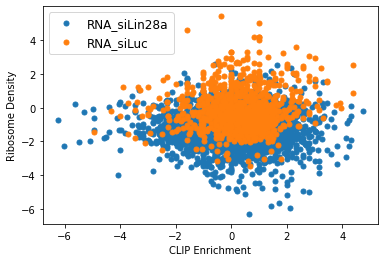

In [27]:
# Scatter plot with a different color by groups
groups = cnts3.groupby('data')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(
        group.clip_enrichment, 
        group.rden_change, 
        marker='o', 
        linestyle='',
        markersize=5,
        label=name
    )
ax.set_xlabel('CLIP Enrichment')
ax.set_ylabel('Ribosome Density')
ax.legend(fontsize=12, loc='upper left') # legend position
plt.show()